In [1]:
from slomo_model import SloMo_model
from dumbmod import Dumb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imshow, imread

%matplotlib inline

In [2]:
# mod = SloMo_model(for_interpolation=False)
mod = Dumb(for_interpolation=True)
img1_dir = '../data/triplets/walk_00220.jpg'
img2_dir = '../data/triplets/walk_00221.jpg'
img3_dir = '../data/triplets/walk_00222.jpg'

In [3]:
img1 = imread(img1_dir)
img2 = imread(img2_dir)
img3 = imread(img3_dir)
imgs = [img1, img2, img3]

/home/mark/Desktop/other/courses/DL/DL-env/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/mark/Desktop/other/courses/DL/DL-env/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/mark/Desktop/other/courses/DL/DL-env/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
imgs = [img.reshape([1, 352, 352, 3]) for img in imgs]
imgs = [img.astype(np.float32) for img in imgs]

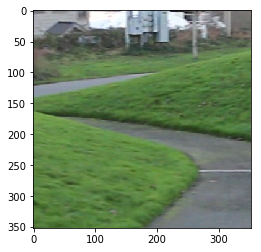

In [5]:
inputs = np.concatenate([imgs[0], imgs[2]], axis=3)
flow_t0, flow_t1, vis_mask_0, vis_mask_1 = \
        mod.inference(inputs)
t = 0.5
z = (1-t) * vis_mask_0 + t * vis_mask_1
imgs = [tf.convert_to_tensor(img) for img in imgs]
pred = (1 / z) * ((1-t) * vis_mask_0
                   * mod.warp(-flow_t0, imgs[0]) 
                   + t * vis_mask_1 
                   * mod.warp(-flow_t1, imgs[2]))

plt.imshow(img2.astype(np.uint8))

In [6]:
def mse(img, pred):
    elems = tf.cast(tf.size(pred), tf.float32)
    return(tf.sqrt(tf.reduce_sum(tf.square(img - pred))) / elems)

def l1_loss(img, pred):
    
    return(tf.reduce_mean(tf.abs(img - pred)))

In [7]:
loss = mse(img2, pred)
loss2 = l1_loss(img2, pred)
opt = tf.train.AdamOptimizer(0.00001)
min_opt = opt.minimize(loss2)

In [8]:
sess = tf.Session()

In [9]:
init = tf.global_variables_initializer()
sess.run(init)
l, new_img, __ = sess.run([loss2, pred, min_opt])

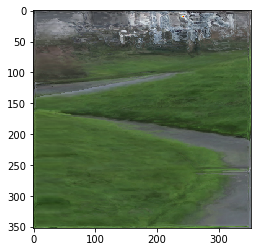

In [10]:
plt.imshow(new_img[0].astype(np.uint8))

In [14]:
for step in range(1000):
    l, new_img, __ = sess.run([loss2, pred, min_opt])
    print('loss @ step '+str(step)+': ', l)

('loss @ step 0: ', 3.9489026)
('loss @ step 1: ', 3.9478164)
('loss @ step 2: ', 3.9491313)
('loss @ step 3: ', 3.9476812)
('loss @ step 4: ', 3.9476833)
('loss @ step 5: ', 3.948841)
('loss @ step 6: ', 3.951842)
('loss @ step 7: ', 3.9541514)
('loss @ step 8: ', 3.9655554)
('loss @ step 9: ', 3.962957)
('loss @ step 10: ', 3.954831)
('loss @ step 11: ', 3.9432275)
('loss @ step 12: ', 3.9416068)
('loss @ step 13: ', 3.9439156)
('loss @ step 14: ', 3.947456)
('loss @ step 15: ', 3.9620507)
('loss @ step 16: ', 3.957326)
('loss @ step 17: ', 3.94565)
('loss @ step 18: ', 3.937387)
('loss @ step 19: ', 3.9385552)
('loss @ step 20: ', 3.9418607)
('loss @ step 21: ', 3.9454052)
('loss @ step 22: ', 3.9556305)
('loss @ step 23: ', 3.944387)
('loss @ step 24: ', 3.9406335)
('loss @ step 25: ', 3.9345968)
('loss @ step 26: ', 3.9316807)
('loss @ step 27: ', 3.9337394)
('loss @ step 28: ', 3.9404607)
('loss @ step 29: ', 3.9475858)
('loss @ step 30: ', 3.9426842)
('loss @ step 31: ', 3.93891

('loss @ step 255: ', 3.8045099)
('loss @ step 256: ', 3.8025985)
('loss @ step 257: ', 3.8022258)
('loss @ step 258: ', 3.8021734)
('loss @ step 259: ', 3.80153)
('loss @ step 260: ', 3.8003283)
('loss @ step 261: ', 3.8013637)
('loss @ step 262: ', 3.8043694)
('loss @ step 263: ', 3.807913)
('loss @ step 264: ', 3.8066773)
('loss @ step 265: ', 3.807591)
('loss @ step 266: ', 3.8023765)
('loss @ step 267: ', 3.7993708)
('loss @ step 268: ', 3.7992902)
('loss @ step 269: ', 3.7984862)
('loss @ step 270: ', 3.7956543)
('loss @ step 271: ', 3.7969465)
('loss @ step 272: ', 3.800274)
('loss @ step 273: ', 3.8023314)
('loss @ step 274: ', 3.79949)
('loss @ step 275: ', 3.8022585)
('loss @ step 276: ', 3.8016407)
('loss @ step 277: ', 3.7997892)
('loss @ step 278: ', 3.7951758)
('loss @ step 279: ', 3.7940042)
('loss @ step 280: ', 3.7919354)
('loss @ step 281: ', 3.790551)
('loss @ step 282: ', 3.7911394)
('loss @ step 283: ', 3.7937462)
('loss @ step 284: ', 3.795095)
('loss @ step 285: 

('loss @ step 511: ', 3.6839502)
('loss @ step 512: ', 3.683879)
('loss @ step 513: ', 3.6826878)
('loss @ step 514: ', 3.6848803)
('loss @ step 515: ', 3.6945176)
('loss @ step 516: ', 3.7113075)
('loss @ step 517: ', 3.6845233)
('loss @ step 518: ', 3.7367163)
('loss @ step 519: ', 3.739809)
('loss @ step 520: ', 3.7337697)
('loss @ step 521: ', 3.7132492)
('loss @ step 522: ', 3.6841943)
('loss @ step 523: ', 3.700472)
('loss @ step 524: ', 3.6884117)
('loss @ step 525: ', 3.689509)
('loss @ step 526: ', 3.689608)
('loss @ step 527: ', 3.6864085)
('loss @ step 528: ', 3.6804008)
('loss @ step 529: ', 3.6793761)
('loss @ step 530: ', 3.6876056)
('loss @ step 531: ', 3.6907468)
('loss @ step 532: ', 3.7045355)
('loss @ step 533: ', 3.6954262)
('loss @ step 534: ', 3.6906304)
('loss @ step 535: ', 3.6776829)
('loss @ step 536: ', 3.6743393)
('loss @ step 537: ', 3.6743212)
('loss @ step 538: ', 3.6762788)
('loss @ step 539: ', 3.6846774)
('loss @ step 540: ', 3.6799128)
('loss @ step 5

('loss @ step 767: ', 3.6204588)
('loss @ step 768: ', 3.6279619)
('loss @ step 769: ', 3.626748)
('loss @ step 770: ', 3.6061904)
('loss @ step 771: ', 3.5983279)
('loss @ step 772: ', 3.600799)
('loss @ step 773: ', 3.6109507)
('loss @ step 774: ', 3.630026)
('loss @ step 775: ', 3.6142128)
('loss @ step 776: ', 3.6074045)
('loss @ step 777: ', 3.5996118)
('loss @ step 778: ', 3.6009605)
('loss @ step 779: ', 3.6004157)
('loss @ step 780: ', 3.5984197)
('loss @ step 781: ', 3.6014915)
('loss @ step 782: ', 3.59854)
('loss @ step 783: ', 3.5955849)
('loss @ step 784: ', 3.5934346)
('loss @ step 785: ', 3.593446)
('loss @ step 786: ', 3.5968761)
('loss @ step 787: ', 3.6018615)
('loss @ step 788: ', 3.620575)
('loss @ step 789: ', 3.602925)
('loss @ step 790: ', 3.6200163)
('loss @ step 791: ', 3.6231384)
('loss @ step 792: ', 3.596562)
('loss @ step 793: ', 3.6564727)
('loss @ step 794: ', 3.630472)
('loss @ step 795: ', 3.6191375)
('loss @ step 796: ', 3.6385555)
('loss @ step 797: '

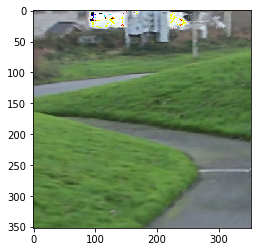

In [15]:
plt.imshow(new_img[0].astype(np.uint8))

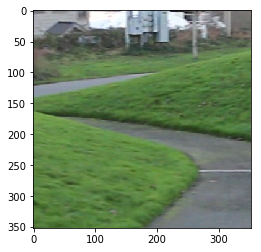

In [21]:
plt.imshow(img2.astype(np.uint8))

In [30]:
sess.run(l1_loss(img2, new_img[0]))

3.567438